# THE MOST USED APP (INSTAGRAM OR WHATSAPP)

In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [139]:
df = pd.read_csv("Screentime.csv")
df.head(10)

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram
5,08/31/2022,19,25,20,Instagram
6,09/01/2022,44,23,57,Instagram
7,09/02/2022,16,28,22,Instagram
8,09/03/2022,27,15,25,Instagram
9,09/04/2022,72,29,30,Instagram


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [99]:
df.shape

(54, 5)

In [100]:
df.columns

Index(['Date', 'Usage', 'Notifications', 'Times opened', 'App'], dtype='object')

In [101]:
df.describe().T #summary of the data

,count,mean,std,min,25%,50%,75%,max
Usage,54.0,65.037037,58.317272,1.0,17.50,58.5,90.50,244.0
Notifications,54.0,117.703704,97.017530,8.0,25.75,99.0,188.25,405.0
Times opened,54.0,61.481481,43.836635,2.0,23.50,62.5,90.00,192.0


In [102]:
formated_dates = []

while True:
    for i in df.Date.values:
        r="-".join(i.split("/")[:2])
        formated_dates.append(r)
    else:
        break
        
df.Date = formated_dates

df.head(10)
                              

,Date,Usage,Notifications,Times opened,App
0,08-26,38,70,49,Instagram
1,08-27,39,43,48,Instagram
2,08-28,64,231,55,Instagram
3,08-29,14,35,23,Instagram
4,08-30,3,19,5,Instagram
5,08-31,19,25,20,Instagram
6,09-01,44,23,57,Instagram
7,09-02,16,28,22,Instagram
8,09-03,27,15,25,Instagram
9,09-04,72,29,30,Instagram


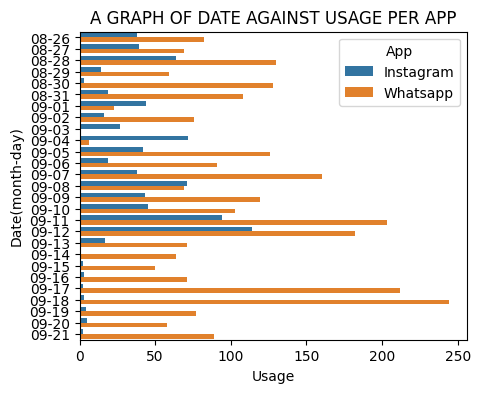

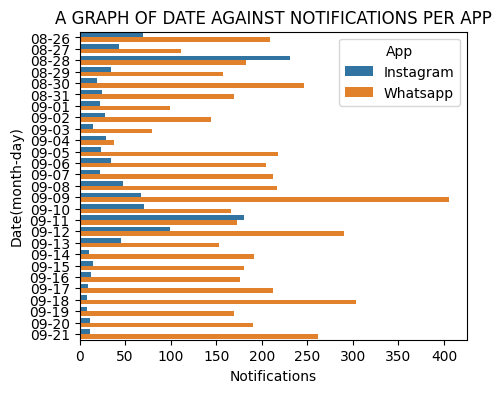

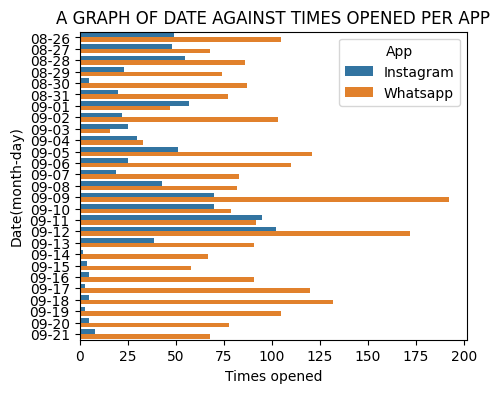

In [103]:
# ploting 

for i in df.iloc[:,:-1].drop(columns="Date",axis=0):
    plt.figure(figsize = (5,4))
    sns.barplot(data = df,y = "Date",x = i, hue= "App")
    plt.title(f"A GRAPH OF DATE AGAINST {i.upper()} PER APP")
    plt.ylabel("Date(month-day)")
    plt.show()
    

# whatsapp is used,opened and has more notifications than instagram as per the graph

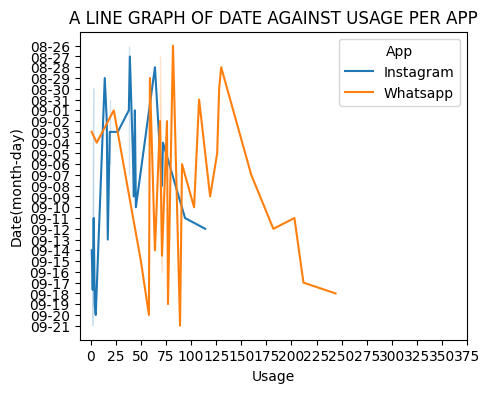

In [104]:
# ploting a line graph


plt.figure(figsize = (5,4))
sns.lineplot(data = df,y = "Date",x = "Usage", hue= "App")
plt.title(f"A LINE GRAPH OF DATE AGAINST USAGE PER APP")
plt.xticks([i for i in range(0,400,25)])
plt.ylabel("Date(month-day)")
plt.show()
    

In [105]:
df.isnull().any() # checking for missing values in the dataframe

Date             False
Usage            False
Notifications    False
Times opened     False
App              False
dtype: bool

In [106]:
df.App.unique()

array(['Instagram', 'Whatsapp'], dtype=object)

In [107]:
# spliting data for instagram and whatsapp screen time

insta = df[df.App == "Instagram"]
insta.head(10)

,Date,Usage,Notifications,Times opened,App
0,08-26,38,70,49,Instagram
1,08-27,39,43,48,Instagram
2,08-28,64,231,55,Instagram
3,08-29,14,35,23,Instagram
4,08-30,3,19,5,Instagram
5,08-31,19,25,20,Instagram
6,09-01,44,23,57,Instagram
7,09-02,16,28,22,Instagram
8,09-03,27,15,25,Instagram
9,09-04,72,29,30,Instagram


In [108]:
whats_app = df[df.App == "Whatsapp"]
whats_app.head(10)


,Date,Usage,Notifications,Times opened,App
27,08-26,82,209,105,Whatsapp
28,08-27,69,111,68,Whatsapp
29,08-28,130,183,86,Whatsapp
30,08-29,59,157,74,Whatsapp
31,08-30,128,246,87,Whatsapp
32,08-31,108,169,77,Whatsapp
33,09-01,23,99,47,Whatsapp
34,09-02,76,144,103,Whatsapp
35,09-03,1,80,16,Whatsapp
36,09-04,6,38,33,Whatsapp


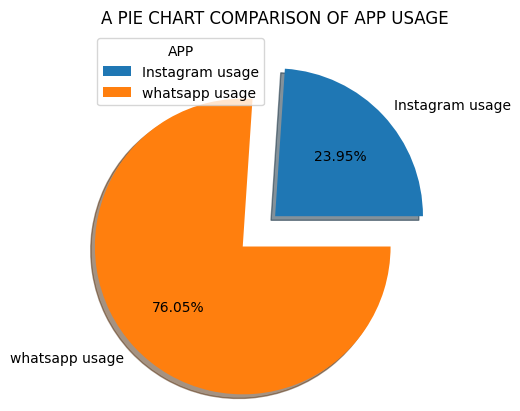

In [109]:
labels = ["Instagram usage","whatsapp usage"]
plt.pie([insta.iloc[:,1].sum(),whats_app.iloc[:,1].sum()], labels=labels,autopct="%1.2f%%",shadow = True,explode = (0,0.3))
plt.title("A PIE CHART COMPARISON OF APP USAGE")
plt.legend(title = "APP")
plt.show()

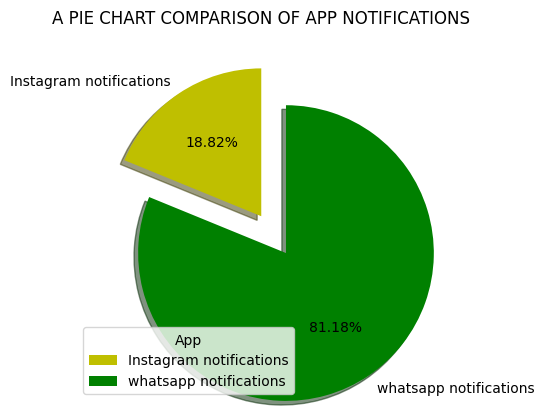

In [110]:
labels = ["Instagram notifications","whatsapp notifications"]
plt.pie([insta.iloc[:,2].sum(),whats_app.iloc[:,2].sum()], labels=labels,autopct="%1.2f%%",shadow = True,explode = (0,0.3),colors = (["y","g"]),startangle = 90)
plt.title("A PIE CHART COMPARISON OF APP NOTIFICATIONS")
plt.legend(title="App")
plt.show()

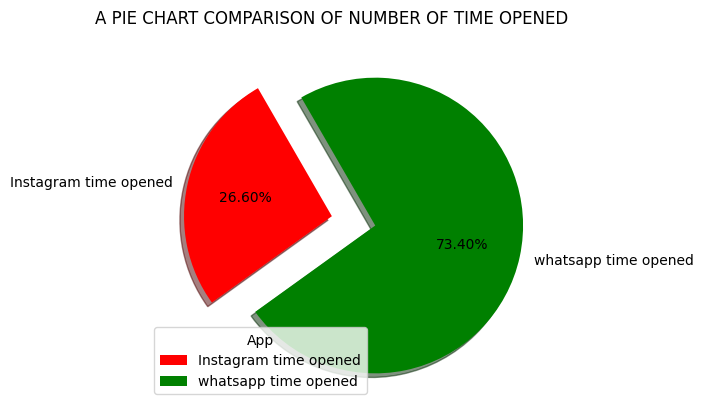

In [111]:
labels = ["Instagram time opened","whatsapp time opened"]
plt.pie([insta.iloc[:,3].sum(),whats_app.iloc[:,3].sum()], labels=labels,autopct="%1.2f%%",shadow = True,explode = (0,0.3),colors = (["r","g"]),startangle = 120)
plt.title("A PIE CHART COMPARISON OF NUMBER OF TIME OPENED")
plt.legend(title="App")
plt.show()

In [112]:
# whatsapp is the most active app as the plots show

In [113]:
df.head()

,Date,Usage,Notifications,Times opened,App
0,08-26,38,70,49,Instagram
1,08-27,39,43,48,Instagram
2,08-28,64,231,55,Instagram
3,08-29,14,35,23,Instagram
4,08-30,3,19,5,Instagram


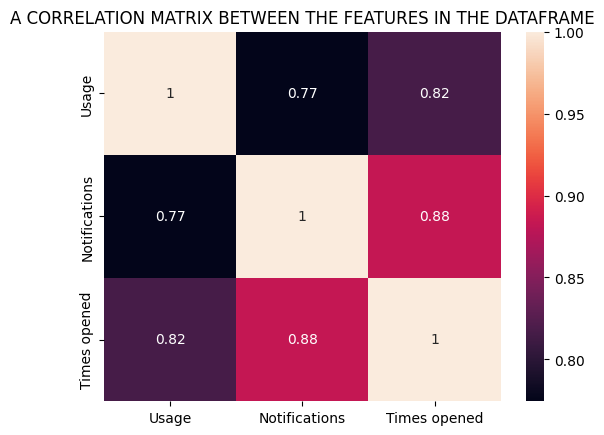

In [114]:
# inspecting correlation between variables in the dataframe

using = df.iloc[:,:-1].drop(columns= "Date",axis = 0)
sns.heatmap(using.corr(),annot= True)
plt.title("A CORRELATION MATRIX BETWEEN THE FEATURES IN THE DATAFRAME")
plt.show()


#Their's high correlation between time openend and usage and also time opened and notifications

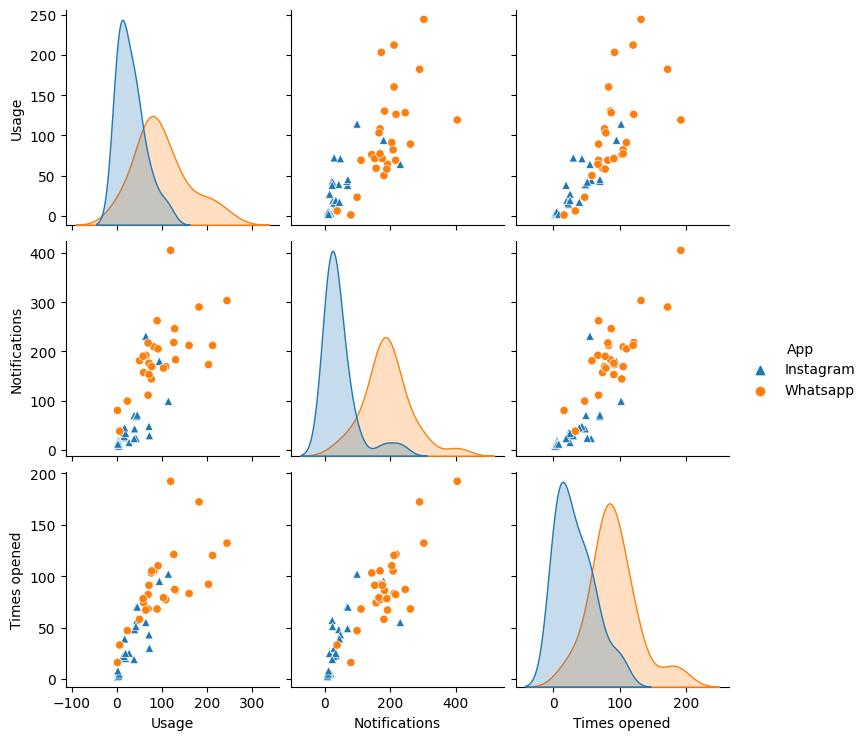

In [123]:
# creating a pair plot for better visualization

#plt.figure(figsize=(10,12))
sns.pairplot(data=df.drop(columns="Date",axis =0),hue = "App",markers = ["^","o"])
#plt.title("A PAIR PLOT BETWEEN FEATURES")
plt.show()

## USING MACHINE LEARNING ALGORITHMS TO MAKE PREDICTIONS WHETHER APP IS INSTAGRAM OR WHATSAPP BASED ON SOME FEATURES

In [190]:
models_acc = [] #list of accuracy score of each model
models =["linear regression","decision tree","svm","knn"] # models being evaluated

In [141]:
df.head()

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram


In [144]:
# using linear regression model

df1 = df.iloc[:,1:]
df1.head() # first column is dropped from the dataframe

,Usage,Notifications,Times opened,App
0,38,70,49,Instagram
1,39,43,48,Instagram
2,64,231,55,Instagram
3,14,35,23,Instagram
4,3,19,5,Instagram


In [152]:
# mapping 0 and 1 to the y 

mapping = {"Instagram":0,"Whatsapp":1}
df1.App = df.App.map(mapping)
df1.head(40)

,Usage,Notifications,Times opened,App
0,38,70,49,0
1,39,43,48,0
2,64,231,55,0
3,14,35,23,0
4,3,19,5,0
5,19,25,20,0
6,44,23,57,0
7,16,28,22,0
8,27,15,25,0
9,72,29,30,0


In [153]:
# spliting data to x and y features

x= df1.iloc[:,:-1]
y = df1.iloc[:,-1]
x.shape

(54, 3)

In [154]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: App, dtype: int64

In [163]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
X_train


,Usage,Notifications,Times opened
10,42,24,51
28,69,111,68
22,2,9,3
31,128,246,87
38,91,205,110
37,126,218,121
7,16,28,22
14,43,68,70
27,82,209,105
35,1,80,16


In [164]:
# training the model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [165]:
prediction = lr.predict(X_test)
print(prediction)

[1.30969706 0.44077806 0.70132734 0.10686281 0.16212284 1.18188395
 0.73423292 0.70639123 0.56782008 0.66484205 0.16136804]


In [191]:
print("Accuracy score:",str(lr.score(x,y)*100)+"%")
print("coefficients of the model:",lr.coef_)
print("intercept:",lr.intercept_)
models_acc.append(lr.score(x,y)*100)

Accuracy score: 56.00395863321081%
coefficients of the model: [ 0.00027215  0.00580466 -0.00453348]
intercept: 0.07293036897950833


In [170]:
# using decision tree classifier

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train


array([[-0.41156372, -0.89967022, -0.25539057],
       [ 0.02520546, -0.02456198,  0.11283528],
       [-1.05862916, -1.05055095, -1.29508708],
       [ 0.97962699,  1.3333646 ,  0.52438181],
       [ 0.38109145,  0.92095727,  1.02256973],
       [ 0.94727371,  1.05172057,  1.26083351],
       [-0.83215626, -0.85943536, -0.88354054],
       [-0.39538708, -0.45708674,  0.15615597],
       [ 0.23550173,  0.96119213,  0.91426801],
       [-1.0748058 , -0.33638216, -1.0135026 ],
       [ 2.33846442,  0.99136827,  1.23917316],
       [-0.81597962, -0.68843719, -0.51531469],
       [ 0.15461854,  0.55884351,  0.91426801],
       [ 0.13844191,  0.30737563,  0.87094732],
       [-0.36303381, -0.42691059,  0.15615597],
       [-0.78362635, -0.8896115 , -0.92686123],
       [ 1.01198026,  0.69966553,  0.50272147],
       [ 0.42962136,  0.66948938,  0.69766457],
       [-0.05567772,  0.79019397,  0.09117494],
       [-1.05862916, -0.99019866, -1.27342673],
       [-0.15273754,  0.77007654,  0.329

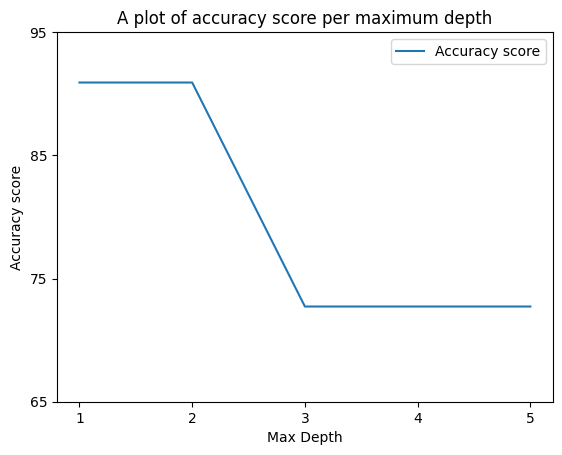

In [182]:
acc = []

for i in range(1,6):
    dt = DecisionTreeClassifier(max_depth=i,random_state=0).fit(X_train,y_train)
    prediction = dt.predict(X_test)
    acc.append(accuracy_score(y_test,prediction)*100)

plt.plot([i for i in range(1,6)],acc,label = "Accuracy score")
plt.title("A plot of accuracy score per maximum depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy score")
plt.xticks([i for i in range(1,6)])
plt.yticks([i for i in range(65,101,10)])
plt.legend()
plt.show()
    
# the max depth woth the best accuracy is 2

In [192]:
dt= DecisionTreeClassifier(criterion="entropy",max_depth=2,random_state=0).fit(X_train,y_train)
pred = dt.predict(X_test)
print("The accuracy of this model is:",str(accuracy_score(y_test,pred)*100)+"%")
models_acc.append(accuracy_score(y_test,pred)*100)

The accuracy of this model is: 90.9090909090909%


In [193]:
# using the support vector machine (svm) algorithm

sm = SVC().fit(X_train,y_train)
pred = sm.predict(X_test)
print("The accuracy of the model is:",str(accuracy_score(y_test,pred)*100)+"%")
models_acc.append(accuracy_score(y_test,pred)*100)
      

The accuracy of the model is: 81.81818181818183%


In [201]:
# using k nearest neighbors algorithm


knn = KNeighborsClassifier(n_neighbors = 6,weights = "uniform").fit(X_train,y_train)
pred = knn.predict(X_test)
print("The accuracy score of the model is:",str(accuracy_score(y_test,pred)*100)+"%")
models_acc.append(accuracy_score(y_test,pred)*100)

The accuracy score of the model is: 81.81818181818183%


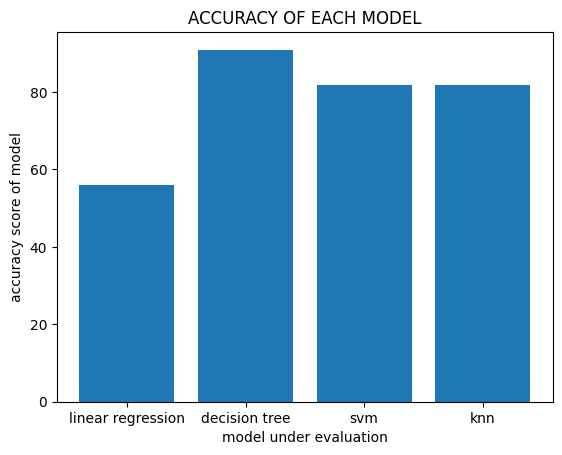

In [208]:
# ploting the accuracy of each model

plt.bar(models,[56,90.9,81.8,81.8])
plt.title("ACCURACY OF EACH MODEL")
plt.ylabel("accuracy score of model")
plt.xlabel("model under evaluation")
plt.show()

### Creating a function that can be used to predict the app used based on usage,notifications and times opened

In [220]:
def which_app(u,n,t):
    sc = StandardScaler()
    value = [[u,n,t]]
    dt= DecisionTreeClassifier(criterion="entropy",max_depth=2,random_state=0).fit(X_train,y_train)
    pred = dt.predict(value)
    return pred


In [218]:
df.tail()

,Date,Usage,Notifications,Times opened,App
49,09/17/2022,212,212,120,Whatsapp
50,09/18/2022,244,303,132,Whatsapp
51,09/19/2022,77,169,105,Whatsapp
52,09/20/2022,58,190,78,Whatsapp
53,09/21/2022,89,262,68,Whatsapp
